#### Introduction
*Every news website classifies the news article before publishing it so that every time visitors visit their website can easily click on the type of news that interests them. Currently, the news articles are classified by hand by the content managers of news websites. But to save time, they can also implement a machine learning model on their websites that read the news headline or the content of the news and classifies the category of the news.*

#### Text Classification
*Text classification datasets are used to categorize natural language texts according to content. For example, think classifying news articles by topic, or classifying book reviews based on a positive or negative response. Text classification is also helpful for language detection, organizing customer feedback, and fraud detection.*

*While this process is time consuming when done manually, it can be automated with machine learning models.*

*Category classification, for news, is a multi-label text classification problem. The goal is to assign one or more categories to a news article. A standard technique in multi-label text classification is to use a set of binary classifiers.*

#### Dataset
*For this task we will use a dataset collected from Kaggle, which contains news articles including their headlines and categories.*

##### Data Field
* *****Article Id***** - *Unique id given to the record*
* *****Article***** - *Text of the header and article*
* *****Category***** - *Category of the article (tech, business, sport, entertainment, politics)*

#### Data Cleaning and Data Preprocessing
*Data Cleaning is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.*

#### Lets Start...

##### Import Libraries
*Lets import the necessary libraries that we need for this task..*

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AbsSayem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AbsSayem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AbsSayem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Dataset
*Here we will use BBC News dataset available in Kaggle. We download it and keep it in the directory we are working on.*

In [15]:
# Import Dataset
dataset = pd.read_csv("BBC News Train.csv")
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [16]:
# Shape of Dataset
dataset.shape

(1490, 3)

In [17]:
# Columns Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [18]:
# Count Categories
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [19]:
# Convert Categories Name into Numerical Index
target_category = dataset['Category'].unique()  #Seperates the unique categories
dataset['CategoryId'] = dataset['Category'].factorize()[0] #Numerical indexing and make a seperate column namely CategoryId
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [20]:
# Show category wise indexing - create a new dataframe 'category' that contains the unique categories, also sorting the list corresponding to CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
print(category)

        Category  CategoryId
0       business           0
3           tech           1
5       politics           2
6          sport           3
7  entertainment           4


##### Exploratory Data Analysis(EDA)
*Exploratory Data Analysis(EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing data before the modeling task. It is not easy to look the whole datasheet and determine important characteristics of the data. It might be tedious, boring and/or overwhelming to device insights by looking at plain numbers. Exploratory Data Analysis techniques have been wooried as an aid in the situation.*

Visualizing Category

*The below graph shows the news article count for category from the dataset*

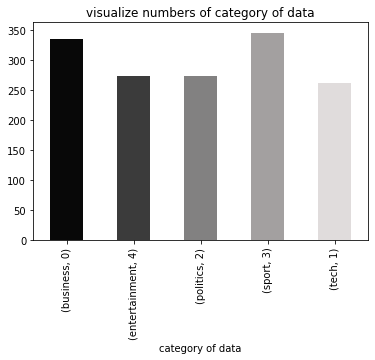

In [34]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind="bar",color=["#080808", "#3b3b3b", "#828181", "#a3a0a0", "#e0dcdc"])
plt.xlabel("category of data")
plt.title("visualize numbers of category of data")
plt.show()

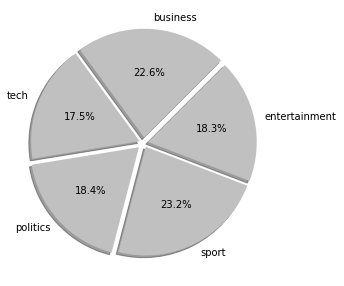

In [37]:
fig = plt.figure(figsize=(5,5))
color = ["silver"]
business = dataset[dataset['CategoryId']==0]
tech = dataset[dataset['CategoryId']==1]
politics = dataset[dataset['CategoryId']==2]
sport = dataset[dataset['CategoryId']==3]
entertainment = dataset[dataset['CategoryId']==4]
count = [business['CategoryId'].count(),
        tech['CategoryId'].count(),
        politics['CategoryId'].count(),
        sport['CategoryId'].count(),
        entertainment['CategoryId'].count()]
pie = plt.pie(count, labels=['business', 'tech', 'politics', 'sport', 'entertainment'], 
                autopct="%1.1f%%",
                shadow=True,
                colors=color,
                startangle=45,
                explode=(0.05, 0.04, 0.06, 0.04, 0.04))

Visualizing Category Related Words

*Here we use WordCloud module to show the category-related words.*

*WordCloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.*

In [ ]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId']==0]
business = business['Text']
tech = dataset[dataset['CategoryId']==1]
tech = business['Text']
politics = dataset[dataset['CategoryId']==2]
politics = business['Text']
sport = dataset[dataset['CategoryId']==3]
sport = business['Text']
entertainment = dataset[dataset['CategoryId']==4]
entertainment = business['Text']

def wordcloud_draw(dataset, color='white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if(word!='news' and word!='text')])
    wordcloud = WordCloud(stopwords=stop, background_color=color, width=2500, height=2500).generate(cleaned_word)

plt.figure(1, figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("business related words")
wordcloud_draw(business, 'white')
print("tech related words")
wordcloud_draw(tech, 'white')
print("politics related words")
wordcloud_draw(politics, 'white')
print("sport related words")
wordcloud_draw(sport, 'white')
print("entertainment related words")
wordcloud_draw(entertainment, 'white')